<a href="https://colab.research.google.com/github/astrovishalthakur/DeepLearning/blob/main/Perceptron/PerceptronTrick.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import make_classification

import numpy as np

X, y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0, n_classes=2, n_clusters_per_class=1, random_state=41, hypercube=False, class_sep=10)

In [2]:
import matplotlib.pyplot as plt


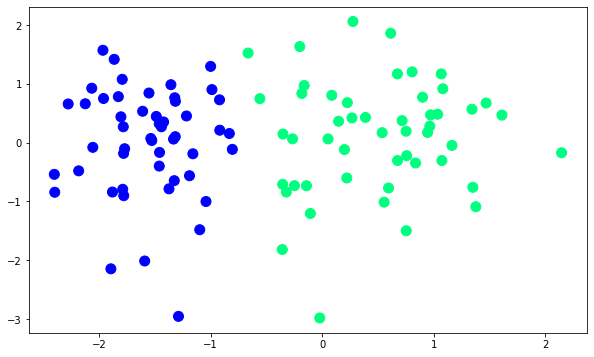

In [4]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:,0], X[:,1], c=y, cmap="winter", s=100)

In [6]:
X[:5]

array([[ 0.19924745, -0.11697552],
       [-0.24882029, -0.73115232],
       [-0.3544904 , -0.7081059 ],
       [-1.59086506, -2.01199214],
       [-0.20083951,  1.63493163]])

In [7]:
np.insert(X, 0, 1, axis=1)[:5]

array([[ 1.        ,  0.19924745, -0.11697552],
       [ 1.        , -0.24882029, -0.73115232],
       [ 1.        , -0.3544904 , -0.7081059 ],
       [ 1.        , -1.59086506, -2.01199214],
       [ 1.        , -0.20083951,  1.63493163]])

In [16]:
y[:5]

array([1, 1, 1, 0, 1])

In [15]:
print("w0, w1, w2")
np.ones(3)

w0, w1, w2


array([1., 1., 1.])

In [17]:
def perceptron(X, y):
  X = np.insert(X, 0, 1, axis=1)
  weights = np.ones(X.shape[1])

  lr = 0.1

  for i in range(1000):
    j = np.random.randint(0, 100)
    # j represents random data point we pick from our dataset to check 
    # validity of model.
    y_hat = step(np.dot(X[j], weights))

    weights = weights + lr*(y[j] - y_hat)*X[j]

  return weights[0], weights[1:]

In [18]:
def step(z):
  return 1 if z > 0 else 0

In [19]:
step(-23)

0

In [20]:
step(21)

1

In [21]:
step(0)

0

In [27]:
intercept_, coef_ = perceptron(X, y) 

In [28]:
print(coef_)
print(intercept_)

[1.26530483 0.2457734 ]
0.9


# Ax + By + C

m = -A/B<br>
c = -C/B

In [29]:
m = -(coef_[0]/coef_[1])
c = -(intercept_/coef_[1])

In [30]:
x_input = np.linspace(-3, 3, 100)
y_input = m*x_input + c

(-3.0, 2.0)

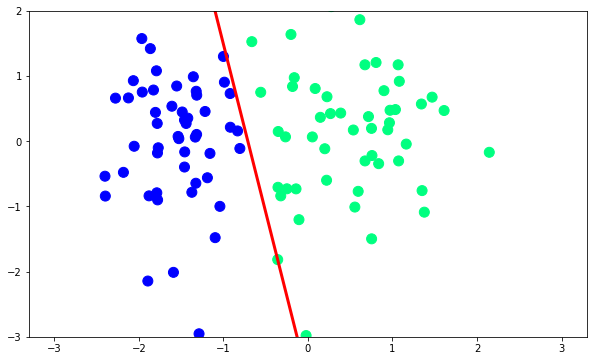

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(x_input, y_input, color="Red", linewidth=3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="winter", s=100)
plt.ylim(-3, 2)

In [42]:
def perceptron2(X, y):
  m = []
  b = []

  X = np.insert(X, 0, 1, axis=1)
  weights = np.ones(X.shape[1])

  lr = 0.1

  for i in range(200):
    j = np.random.randint(0, 100)
    # j represents random data point we pick from our dataset to check 
    # validity of model.
    y_hat = step(np.dot(X[j], weights))

    weights = weights + lr*(y[j] - y_hat)*X[j]

    m.append(-(weights[1]/weights[2]))
    b.append(-(weights[0]/weights[2]))

  return m, b

In [43]:
m, b = perceptron2(X, y)

In [46]:
from matplotlib.animation import FuncAnimation

import matplotlib.animation as animation

In [47]:
a_ = [23]
b_, = [23] # using comman to destructure
c_ = [23][0]
print(a_, b_, c_)

[23] 23 23


In [51]:
fig, ax = plt.subplots(figsize=(10, 6))

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*m[0] + b[0]

ax.scatter(X[:, 0], X[:, 1], c=y, cmap="winter", s=100)

line, = ax.plot(x_i, x_i*m[0] + b[0], "r-", linewidth=2)

plt.ylim(-3, 3)

def update(i):
  label="epoch {0}".format(i + 1)
  line.set_ydata(x_i*m[i] + b[i])
  ax.set_xlabel(label)
  return line, ax

plt.close()

In [52]:
anim = FuncAnimation(fig, update, repeat=True, frames=200, interval=100)


In [53]:
from IPython.display import HTML

HTML(anim.to_html5_video())